## Sample 4.4 Random drawing samples from a genetic distribution with reject sampling

Acceptance rate: 0.09825460519334542
escape 7.939 sec.


C:\Users\HONOR\AppData\Local\Temp/ipykernel_27172/3486089736.py:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Acceptance rate:',N/np.float(k))


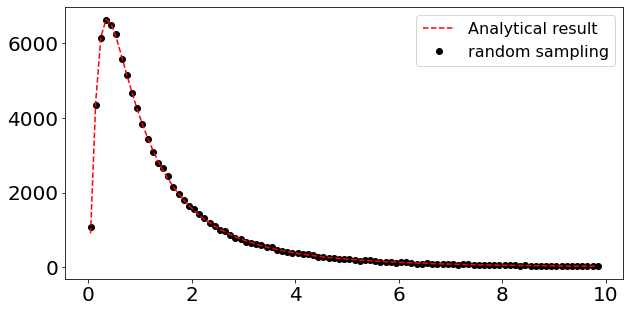

In [1]:
#draw random sample from a generalized PDF
#A. logNormal
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sig2 = 1.
mu = 0.
'''
define a function of log normal distribution 
'''
def lognorm(x,mu,sig):
    return 1./(np.sqrt(2*np.pi)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))

start = time.time()
N = 100000
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,10.)
    y0 = np.random.rand()
    y1 = lognorm(x0,mu,np.sqrt(sig2))
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

xgrid = np.arange(0,10,0.1)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

y = lognorm(xcenter,mu,np.sqrt(sig2))

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hx,'ko')
e2, = ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
plt.legend([e2,e1],['Analytical result','random sampling'],fontsize=16)
# fig.show()

print('Acceptance rate:',N/np.float(k))

print('escape %(s).3f sec.' % {'s':time.time()-start})

Acceptance rate: 0.04017290417958895


C:\Users\HONOR\AppData\Local\Temp/ipykernel_27172/2963613847.py:44: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Acceptance rate:', N/np.float(k))


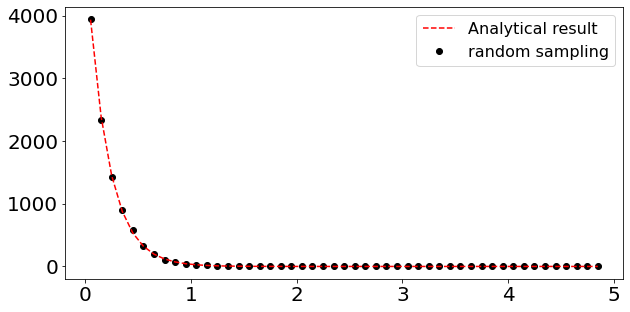

In [2]:
'''
draw random sample from an exponential PDF
parameter of the exponential density
'''

h = 0.2

#define the density function
def exponential(x,h):
    return 1./h*np.exp(-x/h)

#draw 1000 random samples
N = 10000

#rejection sampling
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,5.)
    y0 = np.random.rand()/h
    y1 = exponential(x0,h)
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

# analyze the samples in histogram
xgrid = np.arange(0,5,0.1)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

#calculate the density function analytically
y = exponential(xcenter,h)

#draw histogram and compare with the analytic density curve
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hx,'ko')
e2, = ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
plt.legend([e2,e1],['Analytical result','random sampling'],fontsize=16)
# fig.show()

print('Acceptance rate:', N/np.float(k))

Acceptance rate: 0.1997


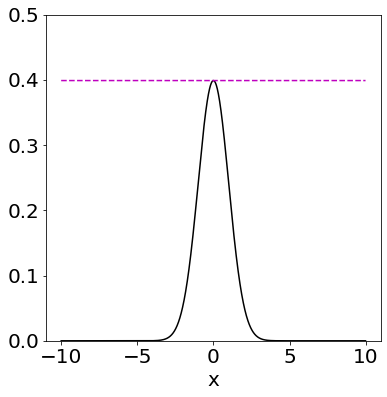

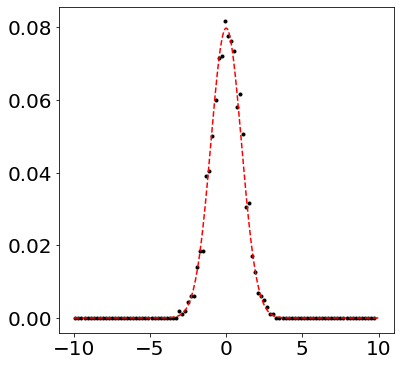

In [3]:
'''
rejection sampling using a Gaussian as a sample
'''
import scipy.stats as stats

xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 

y = stats.norm.pdf(xcenter,loc=0.,scale=1.)

z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z = z_3

# N=100000

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,y,'k-')
ax.plot(xcenter,z,'m--')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
# fig.show()

N=10000
#step 1: draw random numbers from y3
x_rand1 = np.random.uniform(-5.,5.,size=N)
y_rand1 = np.random.uniform(0.,1./np.sqrt(2*np.pi)+0.1,size=N)
x = x_rand1[y_rand1<=stats.norm.pdf(x_rand1,loc=0.,scale=1.)]

xgrid_l = np.arange(-10,10,0.2)
xcenter_l = (xgrid_l[1:]+xgrid_l[:-1])/2. 
hx2,xedge = np.histogram(x,xgrid_l)

y2 = stats.norm.pdf(xcenter,loc=0.,scale=1.)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter_l,hx2/sum(hx2),'k.')
ax.plot(xcenter,y2/sum(y2)*0.2/0.01,'r--')
# fig.show()

print('Acceptance rate:',len(x)/float(N))

Acceptance rate: 0.26042604260426044


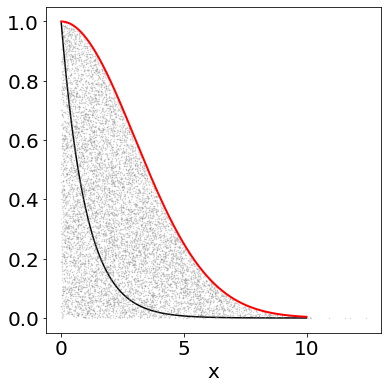

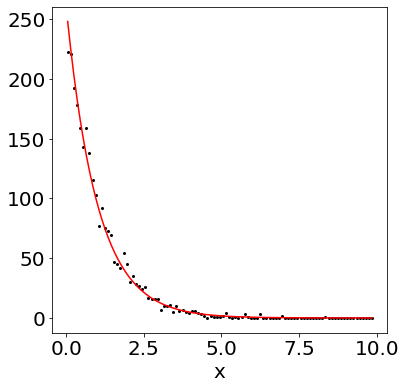

In [4]:
'''
draw random samples following exponential density distribution with help from a normal distribution that enclose the exponential
'''

def exponential(x,h):
    return 1./h*np.exp(-np.abs(x)/h)

N=10000
xgrid = np.arange(0,10,0.01)
xcenter = (xgrid[1:]+xgrid[:-1])/2. 

h = 1.

loc = 0.
scale = 3.

M = np.sqrt(2*np.pi)*scale #so that g(x)*M>p(x)

#this is the distribution from which we want to draw random samples
p_0 = exponential(xcenter,h)
#make sure that there is g(x), satisfying that g(x)*M>p(x)
g_0 = stats.norm.pdf(xcenter,loc=loc,scale=scale)

#random samples drawn grom g(x)
x = np.random.normal(loc=loc,scale=scale,size=2*N) # a draw from g(x)
x = x[x>=0]
N2 = len(x)

p = exponential(x,h)
g = stats.norm.pdf(x,loc=loc,scale=scale)
u = np.random.uniform(0.,1.,size=N2)
#keep the acceptable random x
x1 = x[u<(p/(M*g))]

xgrid2 = np.arange(0,10,0.1)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx2,xedge = np.histogram(x1,xgrid2)
p_1 = exponential(xcenter2,h)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,p_0,'k-')
ax.plot(x,M*u*g,'.',color=[0.5,0.5,0.5],markersize=1,alpha=0.3)
ax.plot(xcenter,M*g_0,'r-',linewidth=2)

ax.set_xlabel('x',fontsize=20)
#ax.set_ylim([0,0.5])
# fig.show()


fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx2,'k.',markersize=4)
ax.plot(xcenter2,p_1/sum(p_1)*sum(hx2),'r-')
ax.set_xlabel('x',fontsize=20)
#ax.plot(xcenter,y3/np.sum(y3)*np.sum(hx2),'m-')
# fig.show()

print('Acceptance rate:',len(x1)/float(len(x)))